# Investigação de dados

# DataSet: Não comparecimento as consultas médicas

Esta base de dados possui informações de 100.000 consultas médicas no Brasil e está focado na questão de buscar compreender se o paciente irá ou não comparecer a consulta. As características sobre os pacientes são descritas em cada linha.

- **ScheduledDay**: informa o dia em que o paciente marcou sua consulta.

- **Neighborhood**: indica a localização do hospital.

- **Scholarship**: indica se o paciente está ou não envolvido com o programa Bolsa Família. Tenha cuidado ao interpretar a última coluna. 'No' significa que o paciente compareceu a consulta previamente agendada. Por outro lado, 'Yes' signifca que ele não compareceu. 

# Carregar Dados

In [3]:
%matplotlib inline
import pandas as pd
df_appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv');
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Perguntas

1. Quem mais falta as consultas homens ou mulheres? 

In [4]:
df = df_appointments.groupby(['No-show','Gender']).size().tail(2).reset_index(name='Missing appointments')
df.loc[df['Missing appointments'].idxmax()]



No-show                   Yes
Gender                      F
Missing appointments    14594
Name: 0, dtype: object

**Portanto, partindo da análise dos dados é possível concluir que as Mulheres faltam mais.**

2. Qual a proporção de pacientes que não comparecem às consultas? 

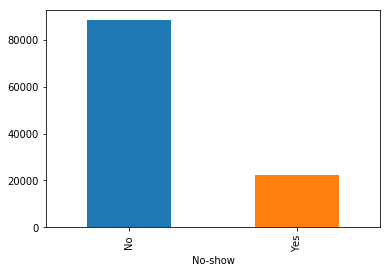

In [5]:
df_appointments.groupby('No-show')['AppointmentID'].nunique().plot(kind='bar')


**Apartir do gráfico acima é possível informar que são poucos pacientes que faltam a consulta.**

3. Qual a distribuição da idade de pacientes que não comparecem às consultas? 

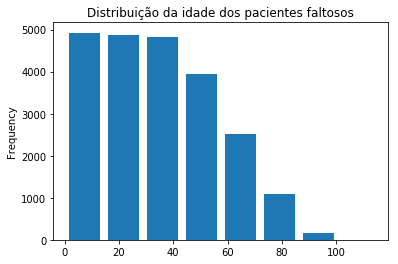

In [360]:
df_appointments.groupby(['No-show'])['Age'].get_group('Yes').plot(kind='hist',bins=8,rwidth=0.8, title="Distribuição da idade dos pacientes faltosos")


4. Há alguma relação entre doença e não comparecimento às consultas? 

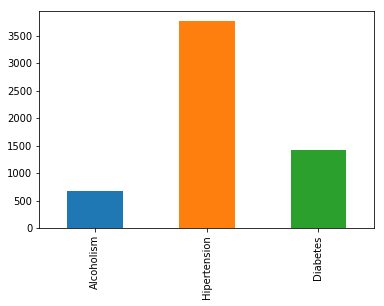

In [225]:
df_H = df_appointments.loc[df_appointments['Hipertension'] == 1, ['No-show', 'Hipertension']]
df_H_Yes = df_H.loc[df_H['No-show'] == 'Yes', ['Hipertension']].count()

df_D = df_appointments.loc[df_appointments['Diabetes'] == 1, ['No-show', 'Diabetes']]
df_D_Yes = df_D.loc[df_D['No-show'] == 'Yes', ['Diabetes']].count()

df_A = df_appointments.loc[df_appointments['Alcoholism'] == 1, ['No-show', 'Alcoholism']]
df_A_Yes = df_A.loc[df_A['No-show'] == 'Yes', ['Alcoholism']].count()

df_all_rows = pd.concat([df_A_Yes, df_H_Yes, df_D_Yes])
df_all_rows.interpolate(method='linear').plot(kind='bar')

**Aparentemente os Hipertensos são mais propensos a falta a consulta**

5. Qual a cidade com maior número de não comparecimentos? 

In [241]:
df = df_appointments.loc[df_appointments['No-show'] == 'Yes', ['No-show', 'Neighbourhood']]
df_grouped = df.groupby('Neighbourhood').size().reset_index(name='Missing appointments')
df_grouped.loc[df_grouped['Missing appointments'].idxmax()]

Neighbourhood           JARDIM CAMBURI
Missing appointments              1465
Name: 38, dtype: object

**Com base na análise de dados, pode-se concluir que JARDIM CAMBURI possui maior número de não comparecimentos nas consultas**

6. Qual é o mês, dia da semana e dia do mês com maior número de não comparecimentos?

In [336]:
df = df_appointments.loc[df_appointments['No-show'] == 'Yes', ['No-show', 'AppointmentDay']]
df_M = df.groupby(df['AppointmentDay'].dt.strftime('%B'))['No-show'].size().reset_index(name='Missing appointments')
print (df_M.loc[df_M['Missing appointments'].idxmax()])

df_data = df_appointments.loc[df_appointments['No-show'] == 'Yes', ['AppointmentDay']]
week_df = df_data.groupby(df_data['AppointmentDay'].dt.weekday_name).size().reset_index(name='Missing appointments')
print (week_df.loc[week_df['Missing appointments'].idxmax()])

df = df_appointments.loc[df_appointments['No-show'] == 'Yes', ['No-show', 'AppointmentDay']]
df_Y = df.groupby(df['AppointmentDay'].dt.strftime('%Y'))['No-show'].size().reset_index(name='Missing appointments')
print(df_Y.loc[df_Y['Missing appointments'].idxmax()])



AppointmentDay            May
Missing appointments    16804
Name: 2, dtype: object
AppointmentDay          Tuesday
Missing appointments       5152
Name: 4, dtype: object
AppointmentDay           2016
Missing appointments    22319
Name: 0, dtype: object


- **Mês: Maio com 16804 não comparecimentos**
- **Ano: 2016 com 22319 não comparecimentos**
- **Dia: Terça-feira com 5152 não comparecimentos**

7. Há alguma correlação entre a participação no programa social Bolsa Família e os comparecimentos? 

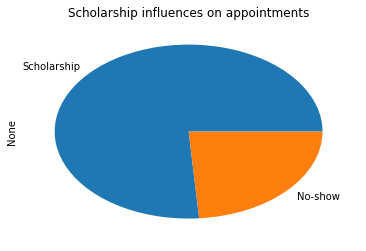

In [357]:
df = df_appointments.loc[df_appointments['Scholarship'] == 1, ['No-show', 'Scholarship']]
df_Yes = df.loc[df['No-show'] == 'No', ['Scholarship']].count()
df_No = df.loc[df['No-show'] == 'Yes', ['No-show']].count()

df_all_rows = pd.concat([df_Yes, df_No])
df_all_rows.interpolate(method='linear').plot(kind='pie', title='Scholarship influences on appointments')


**Quem recebe Bolsa-Familia está mais propenso a ir às consultas**